In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_optical_flow(frame1, frame2, maxcorners= 100, qualitylevel= 0.01, mindist = 7, blocksize= 7):
    # Convert frames to grayscale
    prev_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    curr_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Find good features to track
    prev_pts = cv2.goodFeaturesToTrack(prev_gray, maxCorners=maxcorners, qualityLevel=qualitylevel, minDistance=mindist, blockSize=blocksize)

    # Calculate optical flow
    curr_pts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, curr_gray, prev_pts, None)

    # Select good points
    good_prev = prev_pts[status == 1]
    good_curr = curr_pts[status == 1]

    return good_prev, good_curr

In [ ]:
# Generate sample frames (moving square)
frame1 = np.zeros((100, 100, 3), dtype=np.uint8)
frame2 = np.zeros((100, 100, 3), dtype=np.uint8)

frame1[20:40, 20:40] = 255
frame2[25:45, 25:45] = 255

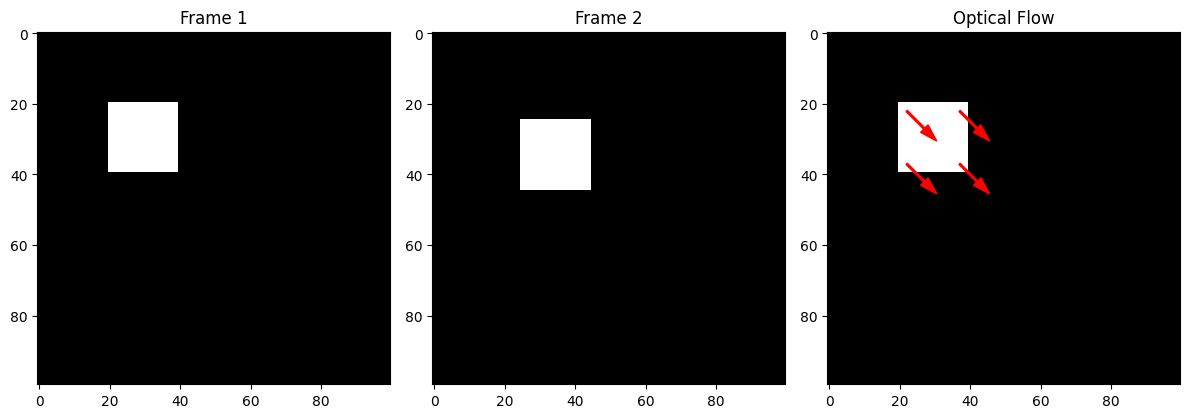

Point 0: Movement from (37.00, 37.00) to (42.00, 42.00)
Point 1: Movement from (22.00, 37.00) to (27.00, 42.00)
Point 2: Movement from (37.00, 22.00) to (42.00, 27.00)
Point 3: Movement from (22.00, 22.00) to (27.00, 27.00)


In [ ]:
# Calculate optical flow
prev_pts, curr_pts = calculate_optical_flow(frame1, frame2)

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')

plt.subplot(132)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')

plt.subplot(133)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
              color='r', width=0.5, head_width=3, head_length=5)
plt.title('Optical Flow')

plt.tight_layout()
plt.show()

# Print the flow vectors
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

In [ ]:
# video
!gdown 1RfNxo4AFAdTuzkIRc5jtYzC_-HrugKFu

Downloading...
From (original): https://drive.google.com/uc?id=1RfNxo4AFAdTuzkIRc5jtYzC_-HrugKFu
From (redirected): https://drive.google.com/uc?id=1RfNxo4AFAdTuzkIRc5jtYzC_-HrugKFu&confirm=t&uuid=b68000bf-07cf-4fe2-ac86-0e130a319da2
To: /content/empty4.mp4
100% 395M/395M [00:01<00:00, 217MB/s]


In [ ]:
cap = cv2.VideoCapture('/content/empty4.mp4')
ret, frame1 = cap.read()
ret = cap.grab()
ret = cap.grab()
ret, frame2 = cap.read()
cap.release()

In [ ]:
# Calculate optical flow
prev_pts, curr_pts = calculate_optical_flow(frame1, frame2)

In [ ]:
# Print the flow vectors
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

Point 0: Movement from (1745.00, 77.00) to (1745.05, 77.01)
Point 1: Movement from (1600.00, 63.00) to (1599.99, 63.01)
Point 2: Movement from (1724.00, 51.00) to (1724.03, 50.99)
Point 3: Movement from (1501.00, 77.00) to (1501.00, 77.00)
Point 4: Movement from (1558.00, 68.00) to (1558.00, 68.00)
Point 5: Movement from (66.00, 1005.00) to (65.99, 1005.00)
Point 6: Movement from (1501.00, 55.00) to (1501.00, 55.00)
Point 7: Movement from (1453.00, 76.00) to (1453.00, 76.00)
Point 8: Movement from (1537.00, 63.00) to (1537.00, 62.99)
Point 9: Movement from (1608.00, 68.00) to (1608.00, 68.00)
Point 10: Movement from (1587.00, 72.00) to (1586.99, 72.00)
Point 11: Movement from (1647.00, 78.00) to (1647.02, 78.01)
Point 12: Movement from (1545.00, 68.00) to (1545.00, 68.00)
Point 13: Movement from (69.00, 1023.00) to (69.00, 1023.00)
Point 14: Movement from (1563.00, 570.00) to (1557.43, 588.78)
Point 15: Movement from (1706.00, 50.00) to (1706.00, 50.01)
Point 16: Movement from (1809.00

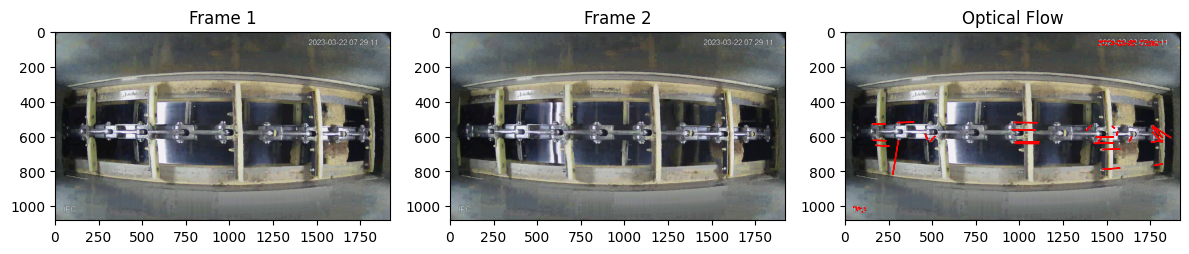

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')

plt.subplot(132)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')

plt.subplot(133)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
              color='r', width=0.5, head_width=3, head_length=5)
plt.title('Optical Flow')


plt.tight_layout()
plt.show()

## โจทย์แล็ปปฏิบัติการ Optical Flow
1. ปรับเปลี่ยนพารามิเตอร์ต่อไปนี้ในฟังก์ชัน `calculate_optical_flow` และสังเกตผลกระทบ:
   - `maxCorners`: ลองใช้ค่า 50, 100 และ 200
   - `qualityLevel`: ลองใช้ค่า 0.005, 0.01 และ 0.05
   - `minDistance`: ลองใช้ค่า 5, 10 และ 15

2. สำหรับการเปลี่ยนแปลงพารามิเตอร์แต่ละครั้ง:
   - บันทึกภาพหน้าจอของการแสดงผล optical flow
   - อธิบายว่าพารามิเตอร์แต่ละตัวส่งผลต่อสิ่งต่อไปนี้อย่างไร:
     - จำนวนจุดที่ติดตาม
     - ความแม่นยำของการประมาณ optical flow
     - การกระจายตัวของจุดคุณลักษณะ (feature points)

## การประยุกต์ใช้จริง
3. บันทึกหรือดาวน์โหลดวิดีโอสองประเภทที่แตกต่างกัน (ความยาว 10-15 วินาทีต่อวิดีโอ):
   - วิดีโอที่มีวัตถุเคลื่อนที่วัตถุเดียวบนพื้นหลังที่อยู่นิ่ง
   - วิดีโอที่มีกล้องเคลื่อนที่ (เช่น การแพนกล้องไปทั่วฉาก)

4. สำหรับวิดีโอแต่ละรายการ:
   - แยกสองเฟรมที่ต่อเนื่องกัน หรืออาจห่างกัน3-4 เฟรมหากต้องการ flow vector ที่ยาวขึ้น
   - ใช้อัลกอริทึม optical flow
   - แสดงภาพของเวกเตอร์การไหล
   - วิเคราะห์ความแตกต่างของรูปแบบการไหลระหว่างสองสถานการณ์

5. เปลี่ยนไปใช้ dense optical flow โดยใช้วิธี Farneback  [(`cv2.calcOpticalFlowFarneback()`)](https://docs.opencv.org/4.x/d4/dee/tutorial_optical_flow.html)
   - เปรียบเทียบผลลัพธ์กับวิธี sparse Lucas-Kanade
   - อภิปรายข้อดีและข้อเสียของแต่ละวิธี

# 1.ปรับเปลี่ยนพารามิเตอร์ต่อไปนี้ในฟังก์ชัน calculate_optical_flow และสังเกตผลกระทบ:

*   maxCorners: ลองใช้ค่า 50, 100 และ 200
*   qualityLevel: ลองใช้ค่า 0.005, 0.01 และ 0.05
*   minDistance: ลองใช้ค่า 5, 10 และ 15


maxcorner
Environt : maxcorner =50,qualitylevel =0.01,mindist =7


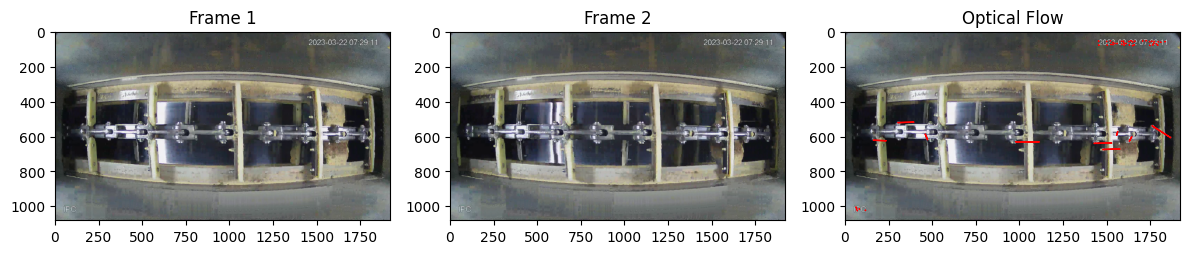

Environt : maxcorner =100,qualitylevel =0.01,mindist =7


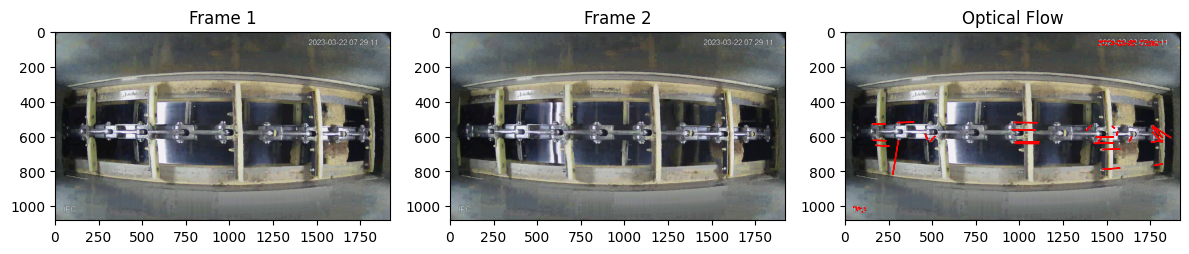

Environt : maxcorner =200,qualitylevel =0.01,mindist =7


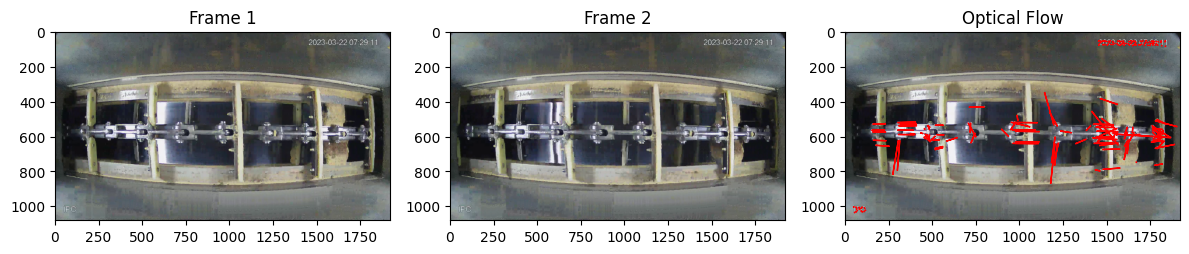


qualitylevel
Environt : maxcorner =100,qualitylevel =0.005,mindist =7


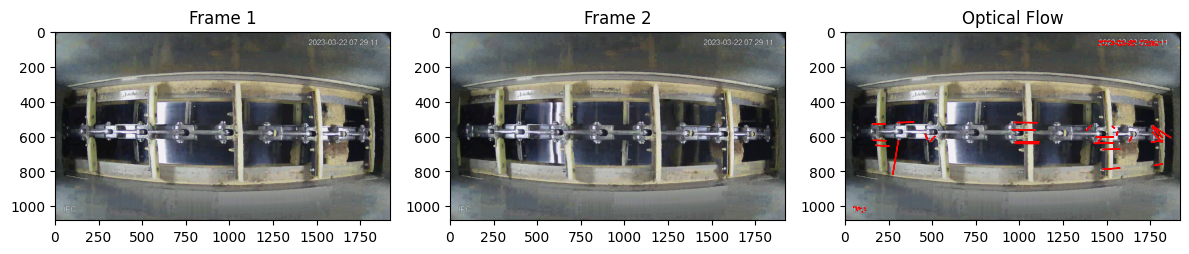

Environt : maxcorner =100,qualitylevel =0.01,mindist =7


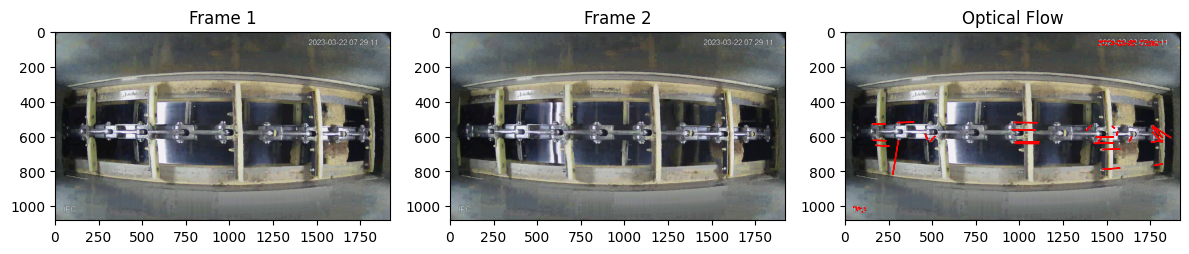

Environt : maxcorner =100,qualitylevel =0.05,mindist =7


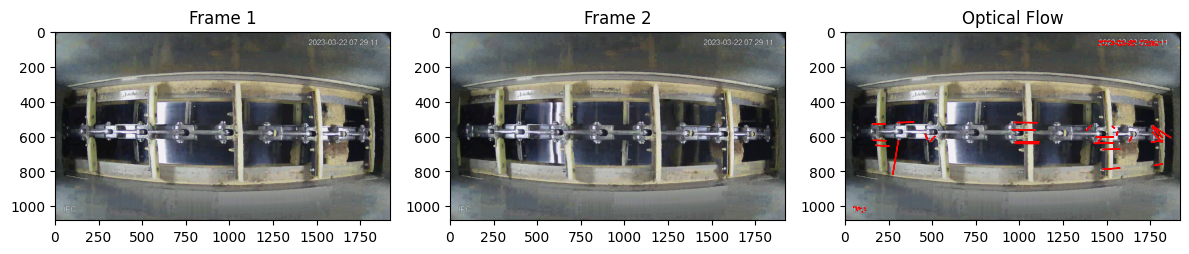


mindist
Environt : maxcorner =100,qualitylevel =0.01,mindist =5


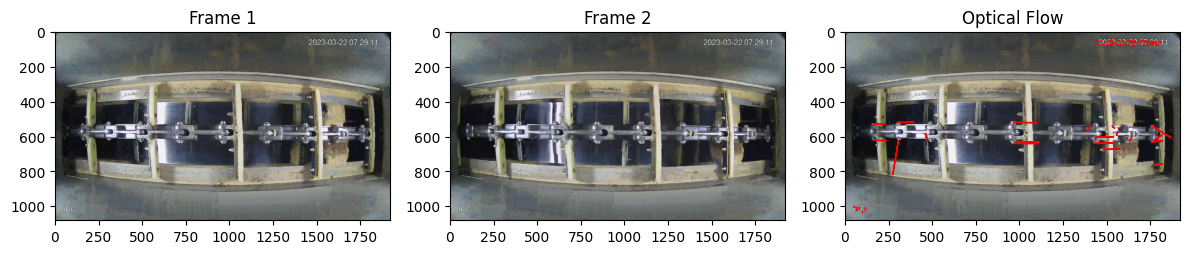

Environt : maxcorner =100,qualitylevel =0.01,mindist =10


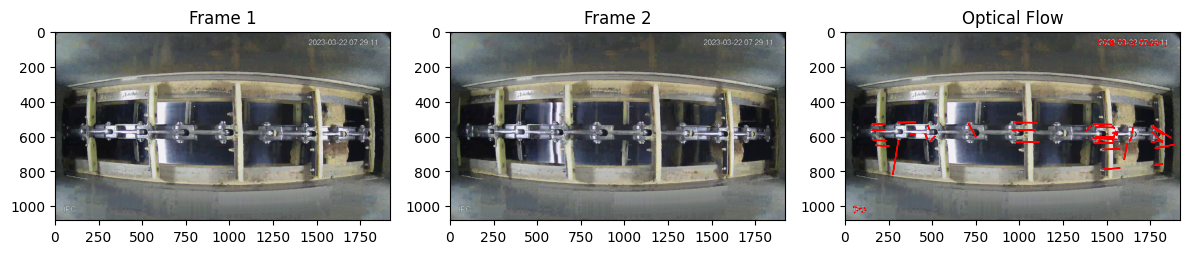

Environt : maxcorner =100,qualitylevel =0.01,mindist =15


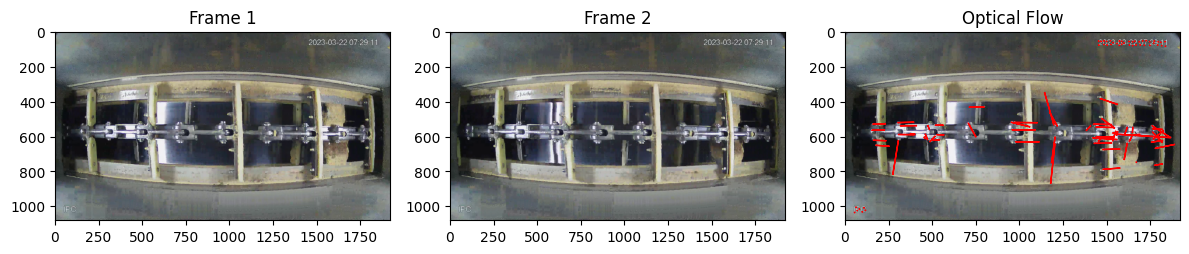

In [ ]:
cap = cv2.VideoCapture('/content/empty4.mp4')
ret, frame1 = cap.read()
ret = cap.grab()
ret = cap.grab()
ret, frame2 = cap.read()
cap.release()

def plot_res(work):
  prev_pts, curr_pts = calculate_optical_flow(frame1,
                                              frame2,
                                              maxcorners= work['maxcorner'],
                                              qualitylevel= work['qualitylevel'],
                                              mindist = work['mindist'])
  for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
      x_prev, y_prev = prev.ravel()
      x_curr, y_curr = curr.ravel()
      # print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

  print(f"Environt : maxcorner ={work['maxcorner']},qualitylevel ={work['qualitylevel']},mindist ={work['mindist']}")
  plt.figure(figsize=(12, 4))
  plt.subplot(131)
  plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
  plt.title('Frame 1')

  plt.subplot(132)
  plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
  plt.title('Frame 2')

  plt.subplot(133)
  plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
  for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
      x_prev, y_prev = prev.ravel()
      x_curr, y_curr = curr.ravel()
      plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
                color='r', width=0.5, head_width=3, head_length=5)
  plt.title('Optical Flow')
  plt.tight_layout()
  plt.show()

for job in ['maxcorner','qualitylevel','mindist']:
  if job == 'maxcorner':
    print('maxcorner')
    work1 = {
        'maxcorner':50,
        'qualitylevel':0.01,
        'mindist':7
    }
    work2 = {
        'maxcorner':100,
        'qualitylevel':0.01,
        'mindist':7
    }
    work3 = {
        'maxcorner':200,
        'qualitylevel':0.01,
        'mindist':7
    }
    for w in [work1, work2, work3]:
      plot_res(w)
    print('')
  if job == 'qualitylevel':
    print('qualitylevel')
    work1 = {
        'maxcorner':100,
        'qualitylevel':0.005,
        'mindist':7
    }
    work2 = {
        'maxcorner':100,
        'qualitylevel':0.01,
        'mindist':7
    }
    work3 = {
        'maxcorner':100,
        'qualitylevel':0.05,
        'mindist':7
    }
    for w in [work1, work2, work3]:
      plot_res(w)
    print('')
  if job == 'mindist':
    print('mindist')
    work1 = {
        'maxcorner':100,
        'qualitylevel':0.01,
        'mindist':5
    }
    work2 = {
        'maxcorner':100,
        'qualitylevel':0.01,
        'mindist':10
    }
    work3 = {
        'maxcorner':100,
        'qualitylevel':0.01,
        'mindist':15
    }
    for w in [work1, work2, work3]:
      plot_res(w)
    print('')

# 2. สำหรับการเปลี่ยนแปลงพารามิเตอร์แต่ละครั้ง:
   - บันทึกภาพหน้าจอของการแสดงผล optical flow
   - อธิบายว่าพารามิเตอร์แต่ละตัวส่งผลต่อสิ่งต่อไปนี้อย่างไร:
     - จำนวนจุดที่ติดตาม
     - ความแม่นยำของการประมาณ optical flow
     - การกระจายตัวของจุดคุณลักษณะ (feature points)



```
Ans:
```



# การประยุกต์ใช้จริง

In [ ]:
!gdown 1mxyXJ3snaYGdfr2YAxKrtmcN6QPs-oGA

Downloading...
From: https://drive.google.com/uc?id=1mxyXJ3snaYGdfr2YAxKrtmcN6QPs-oGA
To: /content/20250306_161328.mp4
100% 23.1M/23.1M [00:00<00:00, 61.1MB/s]


In [ ]:
!gdown 1mvwN_E2KAAfbnVUjeqdyFaYyvU2ThNi5

Downloading...
From: https://drive.google.com/uc?id=1mvwN_E2KAAfbnVUjeqdyFaYyvU2ThNi5
To: /content/20250306_161528.mp4
100% 12.0M/12.0M [00:00<00:00, 46.2MB/s]


# 4.

## case1: วิดีโอที่มีวัตถุเคลื่อนที่วัตถุเดียวบนพื้นหลังที่อยู่นิ่ง 328

Point 0: Movement from (1778.00, 660.00) to (950.18, 716.06)


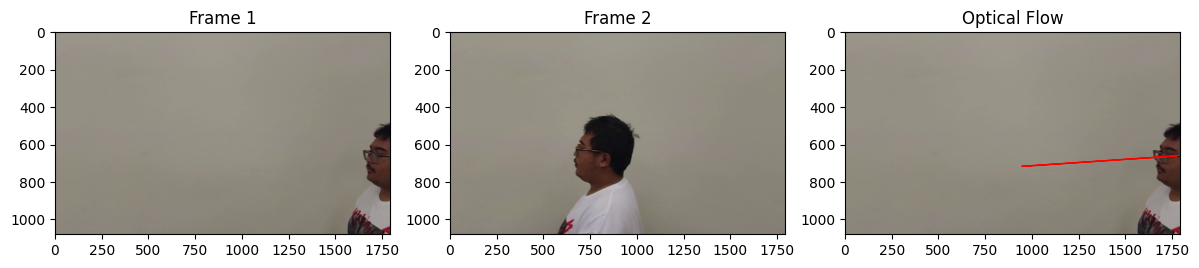

In [ ]:
import numpy as np
import cv2 as cv


cap = cv.VideoCapture('/content/20250306_161328.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)
ret, frame1 = cap.read()
cap.set(cv2.CAP_PROP_POS_FRAMES, 150)
ret, frame2 = cap.read()
cap.release()

prev_pts, curr_pts = calculate_optical_flow(frame1, frame2)

# Print the flow vectors
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')

plt.subplot(132)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')

plt.subplot(133)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
              color='r', width=0.5, head_width=3, head_length=5)
plt.title('Optical Flow')


plt.tight_layout()
plt.show()

## case2: วิดีโอที่มีกล้องเคลื่อนที่ (เช่น การแพนกล้องไปทั่วฉาก)

Point 0: Movement from (1565.00, 305.00) to (1249.22, 327.88)
Point 1: Movement from (1607.00, 387.00) to (1180.73, 515.01)
Point 2: Movement from (1617.00, 409.00) to (1177.49, 498.99)
Point 3: Movement from (1630.00, 469.00) to (1190.05, 771.14)
Point 4: Movement from (1617.00, 421.00) to (1202.80, 590.55)
Point 5: Movement from (1631.00, 540.00) to (1249.75, 605.39)
Point 6: Movement from (1659.00, 392.00) to (1250.10, 431.27)
Point 7: Movement from (1635.00, 520.00) to (1252.28, 605.21)
Point 8: Movement from (1632.00, 416.00) to (1212.81, 599.76)
Point 9: Movement from (1615.00, 619.00) to (1264.88, 435.74)
Point 10: Movement from (1628.00, 456.00) to (1224.98, 710.09)
Point 11: Movement from (1621.00, 1038.00) to (1260.42, 561.62)
Point 12: Movement from (1617.00, 397.00) to (1193.90, 571.66)
Point 13: Movement from (1629.00, 501.00) to (1178.02, 240.90)
Point 14: Movement from (1608.00, 372.00) to (1213.06, 413.73)
Point 15: Movement from (1628.00, 395.00) to (1204.07, 570.65)
P

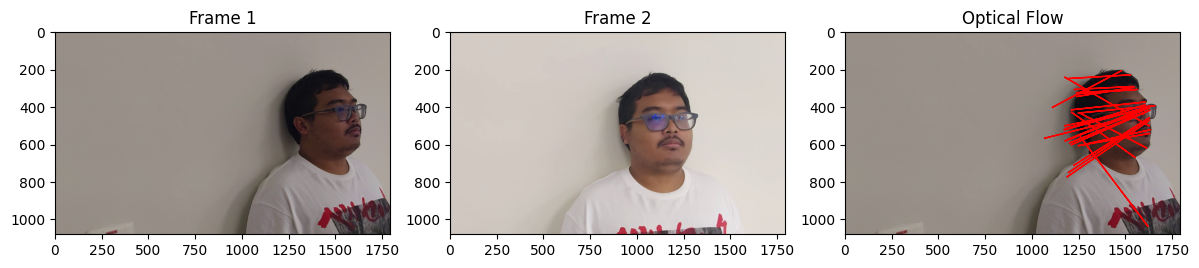

In [ ]:
import numpy as np
import cv2 as cv


cap = cv.VideoCapture('/content/20250306_161528.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 10)
ret, frame1 = cap.read()
cap.set(cv2.CAP_PROP_POS_FRAMES, 200)
ret, frame2 = cap.read()
cap.release()

prev_pts, curr_pts = calculate_optical_flow(frame1, frame2)

# Print the flow vectors
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')

plt.subplot(132)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')

plt.subplot(133)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
    x_prev, y_prev = prev.ravel()
    x_curr, y_curr = curr.ravel()
    plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
              color='r', width=0.5, head_width=3, head_length=5)
plt.title('Optical Flow')


plt.tight_layout()
plt.show()

# 5.

## case1: วิดีโอที่มีวัตถุเคลื่อนที่วัตถุเดียวบนพื้นหลังที่อยู่นิ่ง 328

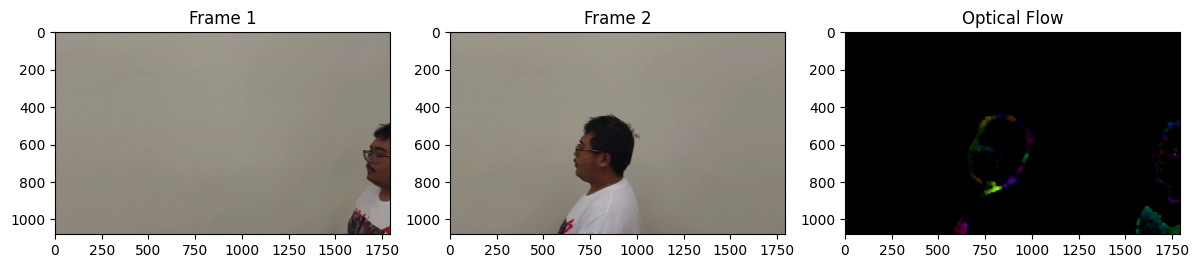

In [ ]:
import numpy as np
import cv2 as cv


cap = cv.VideoCapture('/content/20250306_161328.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 100)
ret, frame1 = cap.read()
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
cap.set(cv2.CAP_PROP_POS_FRAMES, 150)
ret, frame2 = cap.read()
cap.release()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang*180/np.pi/2
hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Print the flow vectors
# for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
#     x_prev, y_prev = prev.ravel()
#     x_curr, y_curr = curr.ravel()
#     print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')

plt.subplot(132)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')

plt.subplot(133)
plt.imshow(bgr)
# for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
#     x_prev, y_prev = prev.ravel()
#     x_curr, y_curr = curr.ravel()
#     plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
#               color='r', width=0.5, head_width=3, head_length=5)
plt.title('Optical Flow')


plt.tight_layout()
plt.show()

## case2: วิดีโอที่มีกล้องเคลื่อนที่ (เช่น การแพนกล้องไปทั่วฉาก)

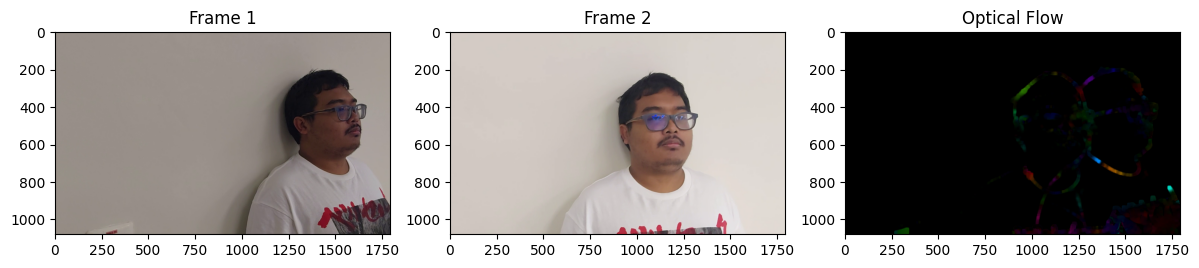

In [ ]:
import numpy as np
import cv2 as cv


cap = cv.VideoCapture('/content/20250306_161528.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES, 10)
ret, frame1 = cap.read()
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
cap.set(cv2.CAP_PROP_POS_FRAMES, 200)
ret, frame2 = cap.read()
cap.release()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
hsv[..., 0] = ang*180/np.pi/2
hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Print the flow vectors
# for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
#     x_prev, y_prev = prev.ravel()
#     x_curr, y_curr = curr.ravel()
#     print(f"Point {i}: Movement from ({x_prev:.2f}, {y_prev:.2f}) to ({x_curr:.2f}, {y_curr:.2f})")

# Visualize the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Frame 1')

plt.subplot(132)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Frame 2')

plt.subplot(133)
plt.imshow(bgr)
# for i, (prev, curr) in enumerate(zip(prev_pts, curr_pts)):
#     x_prev, y_prev = prev.ravel()
#     x_curr, y_curr = curr.ravel()
#     plt.arrow(x_prev, y_prev, x_curr - x_prev, y_curr - y_prev,
#               color='r', width=0.5, head_width=3, head_length=5)
plt.title('Optical Flow')


plt.tight_layout()
plt.show()